In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils1 as imutils

In [77]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 6.1: Image Transformations

In [3]:
image = cv2.imread('images/trex.png')

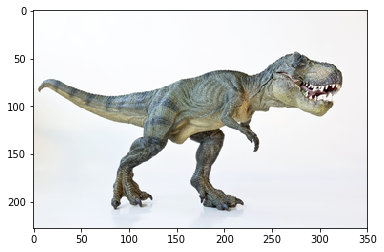

In [4]:
# Original
_ = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### 6.1.1: Translation

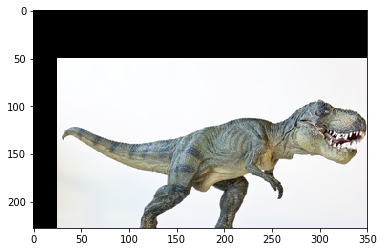

In [5]:
# Shifted down and to the right
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
_ = plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))

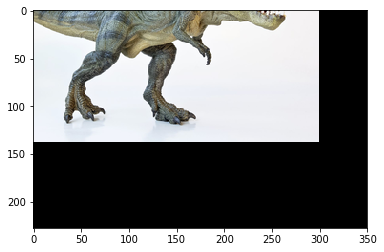

In [6]:
# Shifted up and to the left
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
_ = plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))

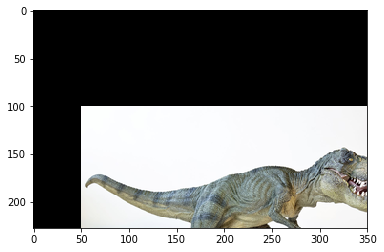

In [7]:
# Testing the imutils library
shifted = imutils.translate(image, 50, 100)
_ = plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))

### 6.1.2: Rotation

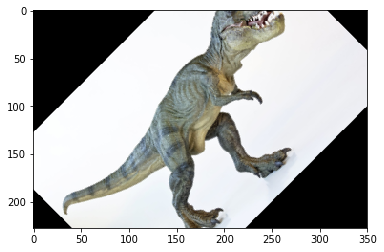

In [8]:
#rotate.py
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
_ = plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

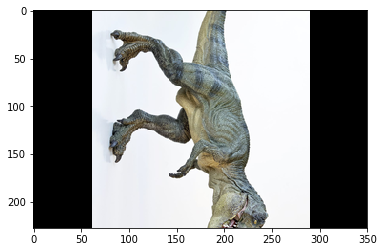

In [9]:
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
_ = plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

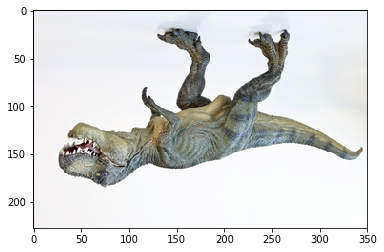

In [10]:
rotated = imutils.rotate(image, 180)
_ = plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

### 6.1.3: Resizing

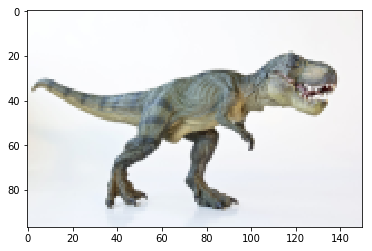

In [11]:
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
_ = plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

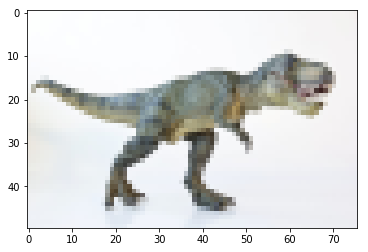

In [12]:
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
_ = plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

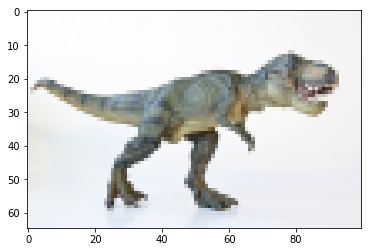

In [13]:
resized = imutils.resize(image, width=100)
_ = plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

### 6.1.4: Flipping

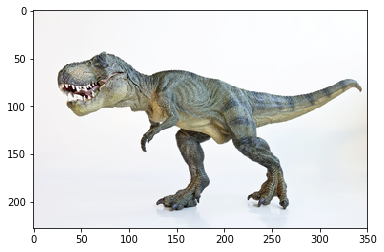

In [14]:
# Flipped horizontally
flipped = cv2.flip(image, 1)
_ = plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))

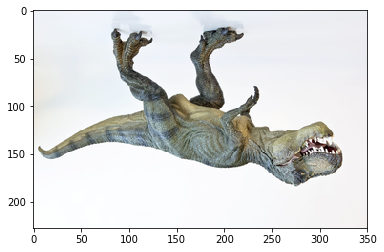

In [15]:
# Flipped vertically
flipped = cv2.flip(image, 0)
_ = plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))

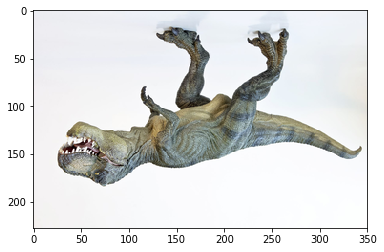

In [16]:
# Flipped horizontally and vertically
flipped = cv2.flip(image, -1)
_ = plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))

### 6.1.5: Cropping

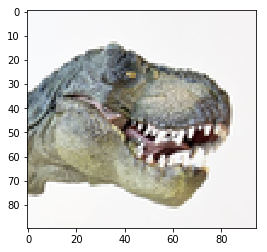

In [17]:
cropped = image[30:120, 240:335]
_ = plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

## 6.2: Image Arithmetic

In [18]:
print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 255: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))

print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

max of 255: [[255]]
min of 255: [[0]]
wrap around: [44]
wrap around: [206]


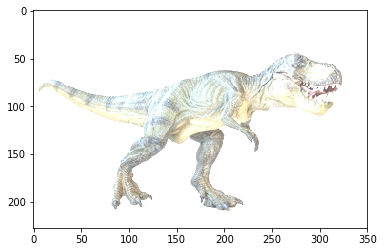

In [19]:
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
_ = plt.imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))

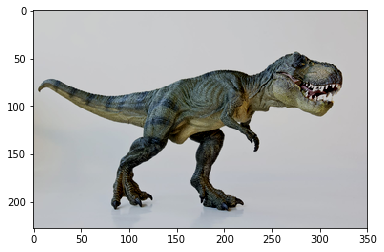

In [20]:
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
_ = plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))

## 6.2: Bitwise Operators

(300, 300)


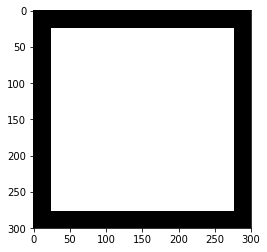

In [21]:
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
print(rectangle.shape)
_ = plt.imshow(cv2.cvtColor(rectangle, cv2.COLOR_GRAY2BGR))

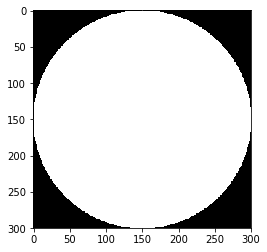

In [22]:
circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
_ = plt.imshow(cv2.cvtColor(circle, cv2.COLOR_GRAY2BGR))

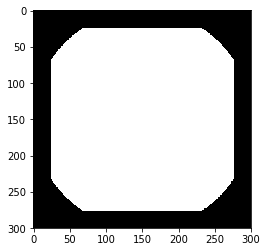

In [23]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
_ = plt.imshow(cv2.cvtColor(bitwiseAnd, cv2.COLOR_GRAY2BGR))

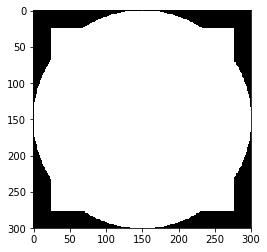

In [24]:
bitwiseOr = cv2.bitwise_or(rectangle, circle)
_ = plt.imshow(cv2.cvtColor(bitwiseOr, cv2.COLOR_GRAY2BGR))

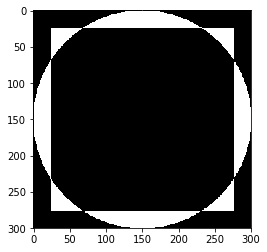

In [25]:
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
_ = plt.imshow(cv2.cvtColor(bitwiseXor, cv2.COLOR_GRAY2BGR))

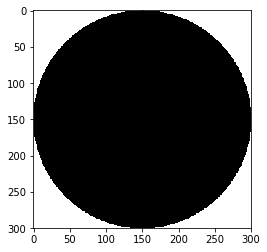

In [26]:
bitwiseNot = cv2.bitwise_not(circle)
_ = plt.imshow(cv2.cvtColor(bitwiseNot, cv2.COLOR_GRAY2BGR))

## 6.4: Masking

In [27]:
image = cv2.imread('images/beach.png')

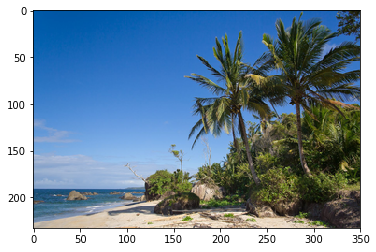

In [28]:
_ = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

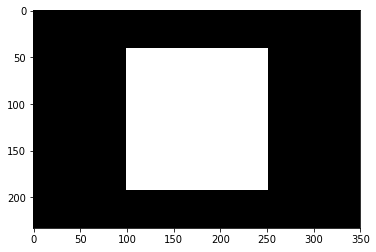

In [29]:
mask = np.zeros(image.shape[:2], dtype="uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75, cY + 75), 255, -1)
_ = plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

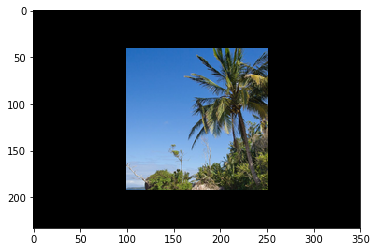

In [30]:
masked = cv2.bitwise_and(image, image, mask=mask)
_ = plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

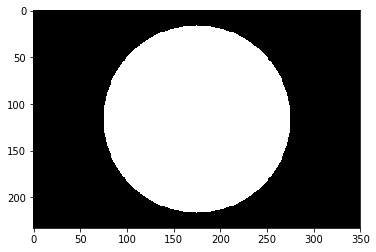

In [31]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
_ = plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

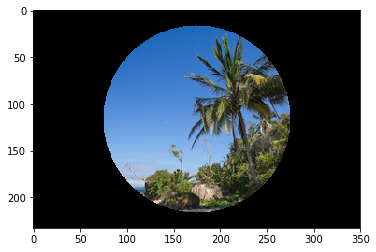

In [32]:
masked = cv2.bitwise_and(image, image, mask=mask)
_ = plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

## 6.5: Splitting and Merging Channels

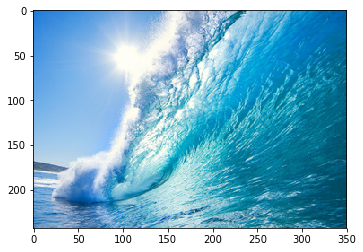

In [33]:
image = cv2.imread('images/wave.png')
_ = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [34]:
(B, G, R) = cv2.split(image)

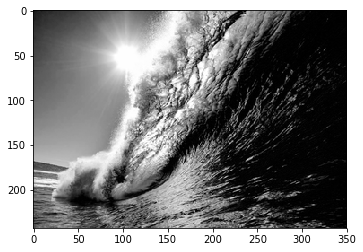

In [35]:
_ = plt.imshow(cv2.cvtColor(R, cv2.COLOR_GRAY2RGB))

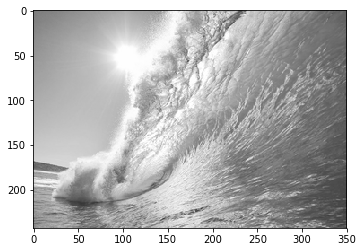

In [36]:
_ = plt.imshow(cv2.cvtColor(G, cv2.COLOR_GRAY2RGB))

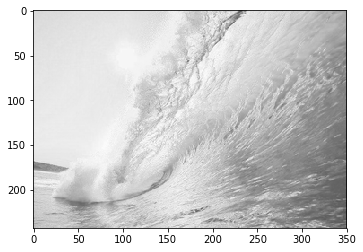

In [37]:
_ = plt.imshow(cv2.cvtColor(B, cv2.COLOR_GRAY2RGB))

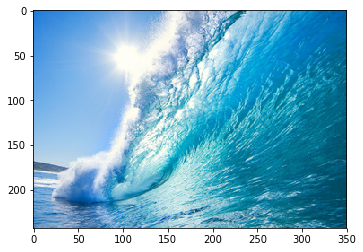

In [38]:
merged = cv2.merge([B, G, R])
_ = plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))

In [39]:
zeros = np.zeros(image.shape[:2], dtype="uint8")

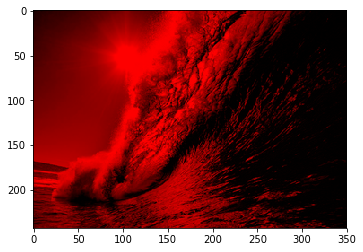

In [43]:
_ = plt.imshow(cv2.merge([R, zeros, zeros]))

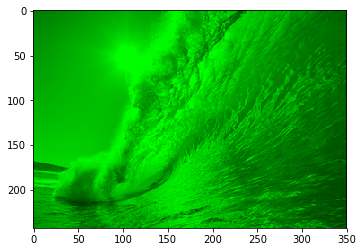

In [44]:
_ = plt.imshow(cv2.merge([zeros, G, zeros]))

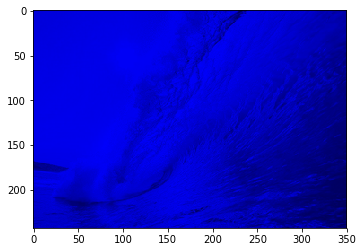

In [45]:
_ = plt.imshow(cv2.merge([zeros, zeros, B]))

## 6.6: Color Spaces

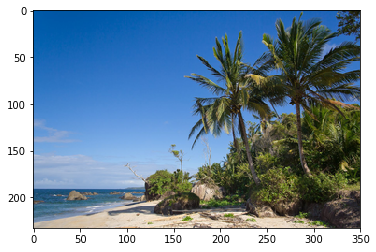

In [70]:
image = cv2.imread("images/beach.png")
_ = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

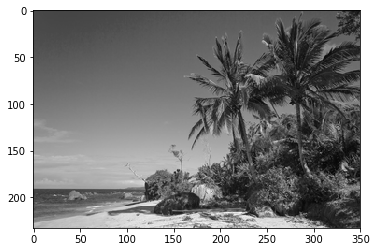

In [73]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_ = plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))

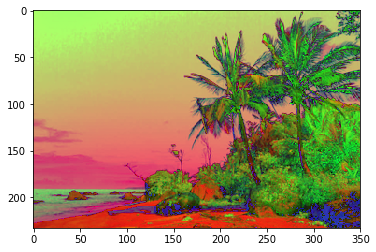

In [84]:
# Found matching color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
_ = plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))

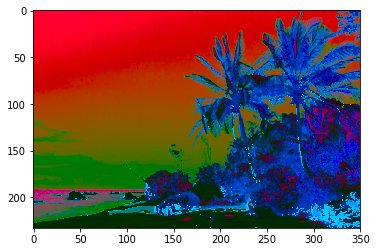

In [92]:
# TODO: verify proper color space mapping
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
_ = plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_LAB2RGB))